In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('data/dataset_final.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
display(df.head())
print("\nDataset Info:")
df.info()


Dataset Shape: (76550, 46)

First few rows of the dataset:


,Unnamed: 0,movie_title,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_wikidata_id,imdb_rating,...,book_won_price,book_rating,book_publisher,book_ratings_count,book_pages,movie_is_adaptation,time_gap,revenue_budget_ratio,movie_revenue_log,movie_budget_log
0,0,Ghosts of Mars,2001.0,43096.596929,98.0,['English'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",Q261700,4.9,...,NaN,NaN,NaN,NaN,260.0,False,NaN,0.500387,4.634443,4.935137
1,1,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,['English'],['United States of America'],"['Mystery', 'Biographical film', 'Drama', 'Cri...",Q16250726,6.1,...,NaN,NaN,NaN,NaN,260.0,False,NaN,NaN,0.000000,0.000000
2,2,Brun bitter,1988.0,NaN,83.0,['Norwegian'],['Norway'],"['Crime Fiction', 'Drama']",Q4978832,5.6,...,NaN,NaN,NaN,NaN,260.0,False,NaN,NaN,0.000000,0.000000
3,3,White Of The Eye,1987.0,NaN,110.0,['English'],['United Kingdom'],"['Thriller', 'Erotic thriller', 'Psychological...",Q7995657,6.1,...,NaN,NaN,NaN,NaN,260.0,False,NaN,NaN,0.000000,0.000000
4,4,A Woman in Flames,1983.0,NaN,106.0,['German'],['Germany'],['Drama'],Q869644,5.9,...,NaN,NaN,NaN,NaN,260.0,False,NaN,NaN,0.000000,0.000000



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76550 entries, 0 to 76549
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            76550 non-null  int64  
 1   movie_title           76550 non-null  object 
 2   movie_release         70771 non-null  float64
 3   movie_revenue         10568 non-null  float64
 4   movie_runtime         76550 non-null  float64
 5   movie_languages       76550 non-null  object 
 6   movie_countries       76550 non-null  object 
 7   movie_genres          76550 non-null  object 
 8   movie_wikidata_id     76549 non-null  object 
 9   imdb_rating           63109 non-null  float64
 10  imdb_total_votes      63109 non-null  float64
 11  movie_budget          14798 non-null  float64
 12  book_wikidata_id      4904 non-null   object 
 13  book_title            4904 non-null   object 
 14  book_author           4811 non-null   object 
 15  book

In [3]:
df_filtered = df.dropna(subset=['movie_budget', 'movie_revenue'])

# Display basic information about the filtered dataset
print("\nFiltered Dataset Shape:", df_filtered.shape)
print("\nFirst few rows of the filtered dataset:")
display(df_filtered.head())



Filtered Dataset Shape: (5703, 46)

First few rows of the filtered dataset:


,Unnamed: 0,movie_title,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_wikidata_id,imdb_rating,...,book_won_price,book_rating,book_publisher,book_ratings_count,book_pages,movie_is_adaptation,time_gap,revenue_budget_ratio,movie_revenue_log,movie_budget_log
0,0,Ghosts of Mars,2001.0,4.309660e+04,98.0,['English'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",Q261700,4.9,...,NaN,NaN,NaN,NaN,260.0,False,NaN,0.500387,4.634443,4.935137
7,7,Alexander's Ragtime Band,1938.0,1.764000e+06,106.0,['English'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",Q1619977,6.8,...,NaN,NaN,NaN,NaN,260.0,False,NaN,1.800000,6.246499,5.991226
12,12,Henry V,1989.0,6.137092e+04,137.0,['English'],['United Kingdom'],"['Costume drama', 'War film', 'Epic', 'Period ...",Q114115,7.5,...,NaN,NaN,NaN,NaN,260.0,False,NaN,1.129011,4.787963,4.735264
16,16,Mary Poppins,1964.0,1.009027e+07,139.0,['English'],['United States of America'],"[""Children's/Family"", 'Musical', 'Fantasy', 'C...",Q209170,7.8,...,NaN,NaN,NaN,NaN,260.0,False,NaN,17.045455,7.003903,5.772294
27,27,Baby Boy,2001.0,9.037644e+04,123.0,['English'],['United States of America'],"['Crime Fiction', 'Drama', 'Coming of age']",Q607122,6.5,...,NaN,NaN,NaN,NaN,260.0,False,NaN,1.836353,4.956055,4.692099


In [4]:
df_adaptations = df_filtered[df_filtered['movie_is_adaptation'] == True]

# Display basic information about the adaptations dataset
print("\nAdaptations Dataset Shape:", df_adaptations.shape)
print("\nFirst few rows of the adaptations dataset:")
display(df_adaptations.head())



Adaptations Dataset Shape: (1155, 46)

First few rows of the adaptations dataset:


,Unnamed: 0,movie_title,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_wikidata_id,imdb_rating,...,book_won_price,book_rating,book_publisher,book_ratings_count,book_pages,movie_is_adaptation,time_gap,revenue_budget_ratio,movie_revenue_log,movie_budget_log
168,168,Straw Dogs,1971.0,633866.387909,118.0,['English'],"['United States of America', 'United Kingdom']","['Thriller', 'Drama']",Q1163628,7.4,...,0.0,NaN,NaN,NaN,260.0,True,2.0,5.067649,5.801998,5.097191
216,216,The Dark Half,1993.0,47940.213796,122.0,['English'],['United States of America'],"['Film adaptation', 'Horror', 'Psychological t...",Q940066,6.0,...,0.0,3.77,G. K. Hall & Company,121111.0,608.0,True,4.0,0.707411,4.680700,4.831028
223,223,Midnight Express,1978.0,733403.297631,121.0,"['French', 'English']","['United States of America', 'United Kingdom']","['Thriller', 'LGBT', 'Indie', 'Crime Fiction',...",Q174699,7.5,...,0.0,4.02,Dutton Books,3290.0,280.0,True,1.0,15.217391,5.865343,4.683003
240,240,The Forbidden Kingdom,2008.0,277948.330792,105.0,"['Standard Mandarin', 'English', 'Standard Can...","['United States of America', 'Hong Kong', 'Chi...","['Wuxia', 'Fantasy Adventure', 'Adventure', 'A...",Q176568,6.5,...,0.0,4.33,University of Chicago Press,451.0,464.0,True,NaN,2.325575,5.443964,5.077434
292,292,Chaplin,1992.0,45279.611313,145.0,['English'],"['France', 'United States of America', 'Italy'...","['Biography', 'Indie', 'Costume drama', 'Perio...",Q556967,7.5,...,0.0,4.19,Penguin UK,4601.0,494.0,True,28.0,0.021149,4.655903,6.330605


In [10]:
def create_movie_revenue_budget_scatter_plot(data, alpha=0.6, figsize=(12,8)):
    """
    Create a scatter plot with regression line for movie data
    
    Parameters:
    -----------
    data : pandas.DataFrame
        DataFrame containing the movie data
    x_col : str
        Name of column to plot on x-axis
    y_col : str 
        Name of column to plot on y-axis
    alpha : float
        Transparency of scatter points
    figsize : tuple
        Figure size as (width, height)
        
    Returns:
    --------
    correlation : tuple
        Pearson correlation coefficient and p-value
    """
    # Create figure
    plt.figure(figsize=figsize)
    
    # Create scatter plot
    sns.scatterplot(data=data, x='movie_budget_log', y='movie_revenue_log', alpha=alpha)
    
    # Add regression line
    sns.regplot(data=data, x='movie_budget_log', y='movie_revenue_log',
                scatter=False, color='red', 
                label='Regression Line')
    
    # Calculate correlation
    correlation = stats.pearsonr(data['movie_budget_log'], data['movie_revenue_log'])
    
    # Add plot details
    plt.title('Movie Budget vs Revenue (Log Scale) for Adaptations')
    plt.xlabel('Log Budget')
    plt.ylabel('Log Revenue')
    plt.text(0.05, 0.95, 
             f'Correlation: {correlation[0]:.2f}\np-value: {correlation[1]:.2e}',
             transform=plt.gca().transAxes)
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return correlation

# Create plot and get correlation stats
correlation = create_scatter_plot(df_adaptations)

plt.show()

# Print summary statistics
print("\nCorrelation Analysis:")
print(f"Pearson correlation coefficient: {correlation[0]:.3f}")
print(f"P-value: {correlation[1]:.3e}")



TypeError: create_scatter_plot() missing 2 required positional arguments: 'x_col' and 'y_col'

In [7]:
#search fro negative revnue and budget 
df_adaptations[df_adaptations['movie_budget'] < 0]



,Unnamed: 0,movie_title,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_wikidata_id,imdb_rating,...,book_won_price,book_rating,book_publisher,book_ratings_count,book_pages,movie_is_adaptation,time_gap,revenue_budget_ratio,movie_revenue_log,movie_budget_log


/var/folders/6g/trn0tjkx2bx7vx6751ly6r500000gn/T/ipykernel_56274/1305156528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adaptations['ROI'] = (df_adaptations['movie_revenue'] - df_adaptations['movie_budget']) / df_adaptations['movie_budget']
/var/folders/6g/trn0tjkx2bx7vx6751ly6r500000gn/T/ipykernel_56274/1305156528.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adaptations['budget_quartile'] = pd.qcut(df_adaptations['movie_budget'],


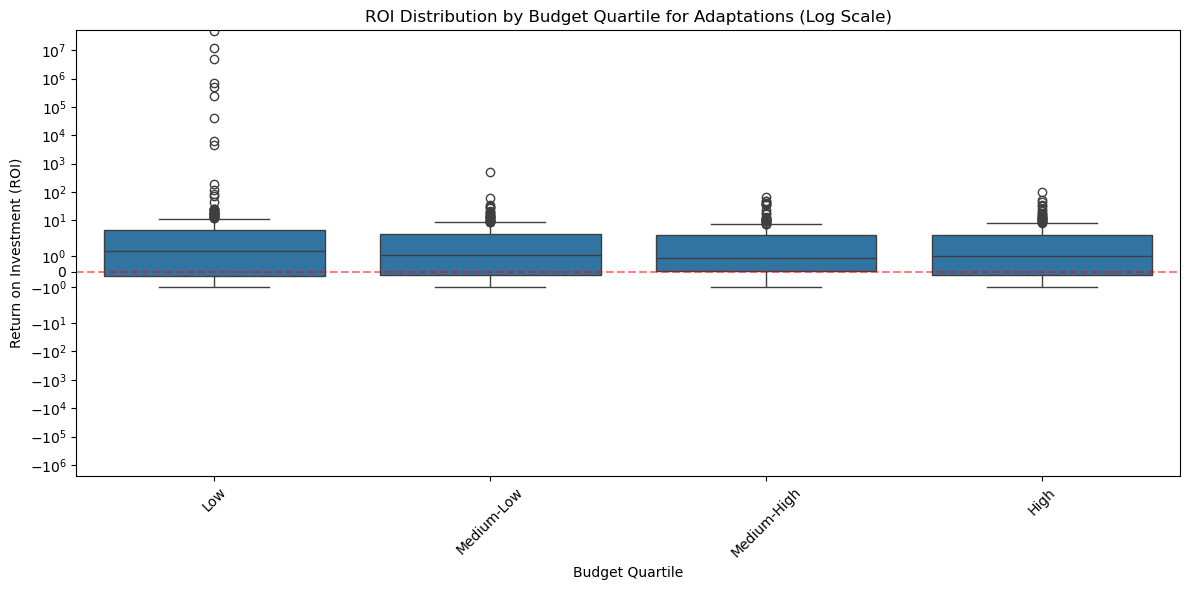


ROI Analysis by Budget Quartile:
                       ROI              movie_budget movie_revenue
                      mean median count         mean          mean
budget_quartile                                                   
Low              229522.35   1.33   290     27960.25     137928.91
Medium-Low            4.55   1.08   289     88329.57     503636.43
Medium-High           3.07   0.89   288    183037.59     771563.78
High                  2.92   0.97   288   1936742.00    3366757.82

Overall ROI Statistics:
count        1155.00
mean        57631.62
std       1455252.70
min            -1.00
25%            -0.20
50%             1.04
75%             3.44
max      47625779.48
Name: ROI, dtype: float64

Percentage of profitable adaptations: 70.2%


/var/folders/6g/trn0tjkx2bx7vx6751ly6r500000gn/T/ipykernel_56274/1305156528.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_adaptations.groupby('budget_quartile').agg({


In [6]:
# Calculate ROI
df_adaptations['ROI'] = (df_adaptations['movie_revenue'] - df_adaptations['movie_budget']) / df_adaptations['movie_budget']

# Create budget quartiles
df_adaptations['budget_quartile'] = pd.qcut(df_adaptations['movie_budget'], 
                                          q=4, 
                                          labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Create visualization
plt.figure(figsize=(12, 6))

# Box plot of ROI by budget quartile with log scale
sns.boxplot(data=df_adaptations, 
            x='budget_quartile', 
            y='ROI',
            whis=1.5)  # Set whiskers to 1.5 IQR

plt.title('ROI Distribution by Budget Quartile for Adaptations (Log Scale)')
plt.xlabel('Budget Quartile')
plt.ylabel('Return on Investment (ROI)')
plt.yscale('symlog')  # Use symmetric log scale to handle negative values
plt.xticks(rotation=45)

# Add a horizontal line at ROI = 0
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Display summary statistics
print("\nROI Analysis by Budget Quartile:")
print(df_adaptations.groupby('budget_quartile').agg({
    'ROI': ['mean', 'median', 'count'],
    'movie_budget': 'mean',
    'movie_revenue': 'mean'
}).round(2))

# Calculate overall ROI statistics
print("\nOverall ROI Statistics:")
print(df_adaptations['ROI'].describe().round(2))

# Calculate percentage of profitable adaptations
profitable_percent = (df_adaptations['ROI'] > 0).mean() * 100
print(f"\nPercentage of profitable adaptations: {profitable_percent:.1f}%")

Original number of adaptations: 1155
Number of adaptations with ratings: 1154
Percentage of adaptations with ratings: 99.9%


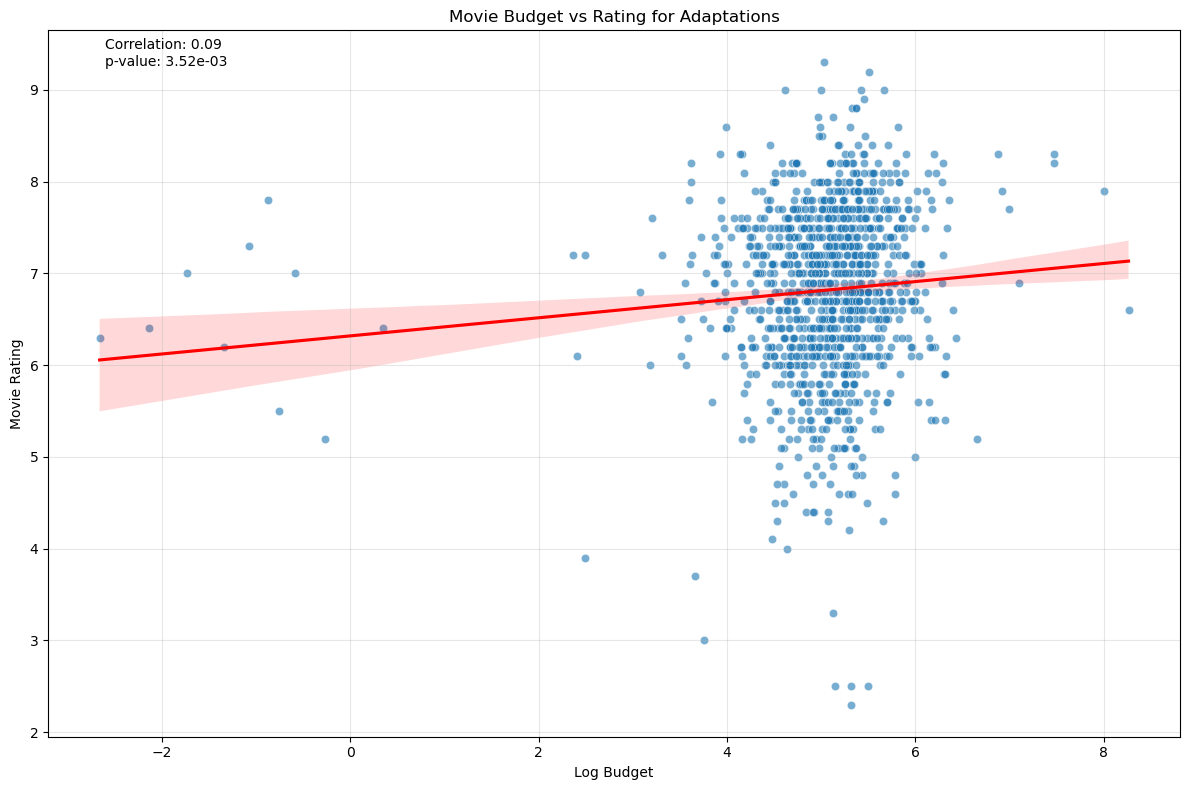


Rating Analysis by Budget Quartile:
                imdb_rating                   
                       mean median count   std
budget_quartile                               
Low                    6.76    6.9   289  0.91
Medium-Low             6.73    6.9   289  0.89
Medium-High            6.78    6.8   288  1.05
High                   7.00    7.0   288  0.89

Overall Rating Statistics:
count    1154.00
mean        6.82
std         0.94
min         2.30
25%         6.20
50%         6.90
75%         7.50
max         9.30
Name: imdb_rating, dtype: float64

Percentage of adaptations rated above 7.0: 44.0%


/var/folders/6g/trn0tjkx2bx7vx6751ly6r500000gn/T/ipykernel_56274/3648963610.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_analysis = df_adaptations_rated.groupby('budget_quartile').agg({


In [11]:
# First check how many ratings we have
print("Original number of adaptations:", len(df_adaptations))
print("Number of adaptations with ratings:", df_adaptations['imdb_rating'].notna().sum())
print("Percentage of adaptations with ratings: {:.1f}%".format(
    df_adaptations['imdb_rating'].notna().sum() / len(df_adaptations) * 100
))

# Filter for non-null ratings
df_adaptations_rated = df_adaptations.dropna(subset=['imdb_rating'])

# Create scatter plot with regression line for budget vs ratings
plt.figure(figsize=(12, 8))

# Create scatter plot
sns.scatterplot(data=df_adaptations_rated, 
                x='movie_budget_log', 
                y='imdb_rating',
                alpha=0.6)

# Add regression line
sns.regplot(data=df_adaptations_rated, 
            x='movie_budget_log', 
            y='imdb_rating',
            scatter=False,
            color='red',
            label='Regression Line')

# Calculate correlation coefficient
correlation = stats.pearsonr(df_adaptations_rated['movie_budget_log'], 
                           df_adaptations_rated['imdb_rating'])

# Add plot details
plt.title('Movie Budget vs Rating for Adaptations')
plt.xlabel('Log Budget')
plt.ylabel('Movie Rating')
plt.text(0.05, 0.95, f'Correlation: {correlation[0]:.2f}\np-value: {correlation[1]:.2e}', 
         transform=plt.gca().transAxes)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics by budget quartile
print("\nRating Analysis by Budget Quartile:")
rating_analysis = df_adaptations_rated.groupby('budget_quartile').agg({
    'imdb_rating': ['mean', 'median', 'count', 'std']
}).round(2)
print(rating_analysis)

# Overall rating statistics
print("\nOverall Rating Statistics:")
print(df_adaptations_rated['imdb_rating'].describe().round(2))

# Calculate percentage of well-rated adaptations (e.g., above 7.0)
rating_threshold = 7.0
high_rated_percent = (df_adaptations_rated['imdb_rating'] > rating_threshold).mean() * 100
print(f"\nPercentage of adaptations rated above {rating_threshold}: {high_rated_percent:.1f}%")

In [8]:
def create_budget_bins(df, n_bins=10):
    """Create budget bins and add them to the dataframe."""
    df['budget_bin'] = pd.qcut(df['movie_budget'], 
                              q=n_bins, 
                              labels=[f'{i+1}th' for i in range(n_bins)])
    return df

def calculate_success_metrics(df):
    """Calculate various success metrics per budget bin."""
    success_metrics = df.groupby('budget_bin').agg({
        'movie_budget': ['mean', 'count'],
        'ROI': ['mean', 'median'],
        'movie_rating': ['mean', 'count'],
        'movie_revenue': 'mean'
    }).round(2)
    
    # Add success rate
    success_metrics['ROI', 'success_rate'] = df.groupby('budget_bin')['ROI'].apply(
        lambda x: (x > 0).mean() * 100
    )
    
    return success_metrics

def normalize_metrics(success_metrics):
    """Normalize success metrics using min-max scaling."""
    def normalize_series(series):
        return (series - series.min()) / (series.max() - series.min())
    
    return pd.DataFrame({
        'ROI': normalize_series(success_metrics['ROI']['mean']),
        'Success_Rate': normalize_series(success_metrics['ROI']['success_rate']),
        'Rating': normalize_series(success_metrics['movie_rating']['mean']),
        'Revenue': normalize_series(success_metrics['movie_revenue']['mean'])
    })

def plot_success_metrics(normalized_metrics, success_metrics):
    """Create visualization of success metrics."""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Normalized ROI
    sns.barplot(x=normalized_metrics.index, y='ROI', data=normalized_metrics, ax=ax1)
    ax1.set_title('Normalized ROI by Budget Bin')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    ax1.set_ylabel('Normalized ROI')
    
    # Plot 2: Normalized success rate
    sns.barplot(x=normalized_metrics.index, y='Success_Rate', data=normalized_metrics, ax=ax2)
    ax2.set_title('Normalized Success Rate by Budget Bin')
    ax2.set_ylabel('Normalized Success Rate')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
    
    # Plot 3: Normalized rating
    sns.barplot(x=normalized_metrics.index, y='Rating', data=normalized_metrics, ax=ax3)
    ax3.set_title('Normalized Rating by Budget Bin')
    ax3.set_ylabel('Normalized Rating')
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
    
    # Plot 4: Normalized revenue
    sns.barplot(x=normalized_metrics.index, y='Revenue', data=normalized_metrics, ax=ax4)
    ax4.set_title('Normalized Revenue by Budget Bin')
    ax4.set_ylabel('Normalized Revenue')
    ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
    
    plt.tight_layout()
    return fig

def print_analysis_results(success_metrics):
    """Print detailed analysis results."""
    print("\nOriginal Values by Budget Bin:")
    print("\nROI:")
    print(success_metrics['ROI']['mean'])
    print("\nSuccess Rate (%):")
    print(success_metrics['ROI']['success_rate'])
    print("\nAverage Rating:")
    print(success_metrics['movie_rating']['mean'])
    print("\nAverage Revenue:")
    print(success_metrics['movie_revenue']['mean'])
    
    print("\nOptimal Budget Bins:")
    print("\nHighest ROI:", success_metrics['ROI']['mean'].idxmax(), 
          f"(ROI: {success_metrics['ROI']['mean'].max():.2f})")
    print("Highest Success Rate:", success_metrics['ROI']['success_rate'].idxmax(),
          f"(Success Rate: {success_metrics['ROI']['success_rate'].max():.1f}%)")
    print("Highest Average Rating:", success_metrics['movie_rating']['mean'].idxmax(),
          f"(Rating: {success_metrics['movie_rating']['mean'].max():.2f})")

def analyze_budget_sweet_spots(df, n_bins=10):
    """Main function to perform the complete analysis."""
    # Create budget bins
    df = create_budget_bins(df, n_bins)
    
    # Calculate metrics
    success_metrics = calculate_success_metrics(df)
    
    # Normalize metrics
    normalized_metrics = normalize_metrics(success_metrics)
    
    # Create visualizations
    fig = plot_success_metrics(normalized_metrics, success_metrics)
    
    # Print analysis
    print_analysis_results(success_metrics)
    
    return success_metrics, normalized_metrics, fig

# Run the analysis
success_metrics, normalized_metrics, fig = analyze_budget_sweet_spots(df_adaptations)
plt.show()


/var/folders/6g/trn0tjkx2bx7vx6751ly6r500000gn/T/ipykernel_58368/901245732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget_bin'] = pd.qcut(df['movie_budget'],
/var/folders/6g/trn0tjkx2bx7vx6751ly6r500000gn/T/ipykernel_58368/901245732.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_metrics = df.groupby('budget_bin').agg({


KeyError: "Column(s) ['ROI', 'movie_rating'] do not exist"